<a href="https://colab.research.google.com/github/CorleoneAppolonia/PMP-2024/blob/main/Lab6/exercitiu_din_clasa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

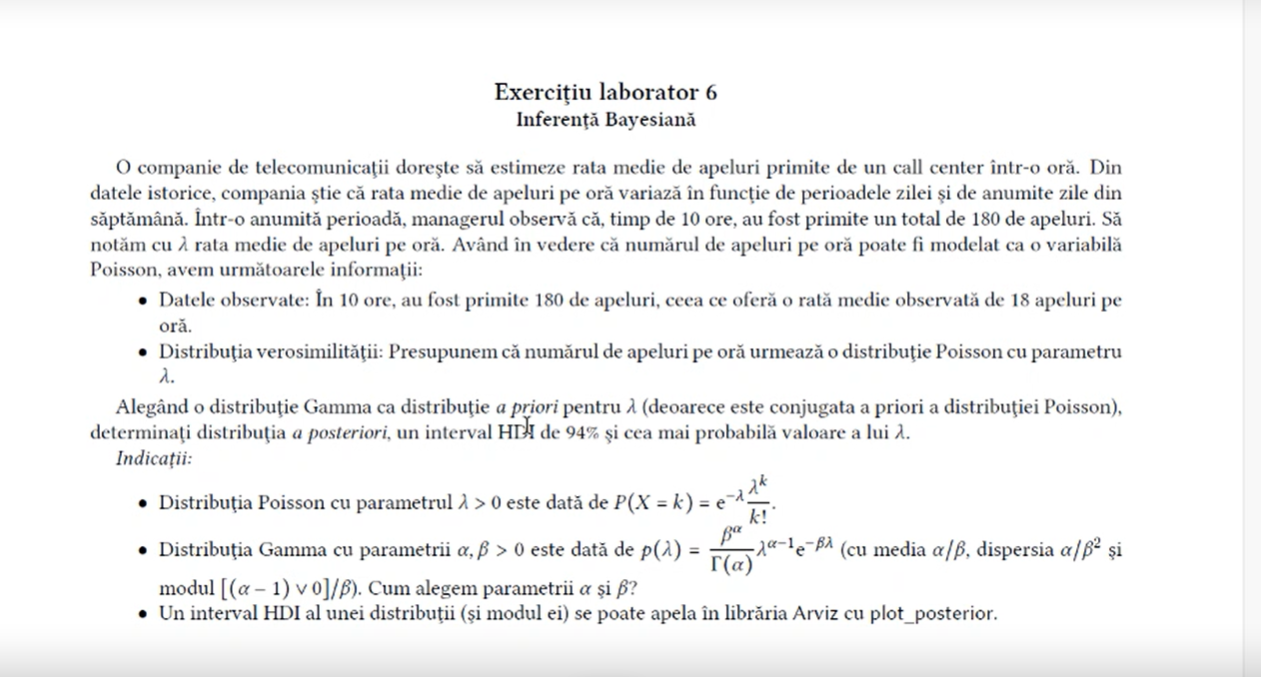

demonstratie: 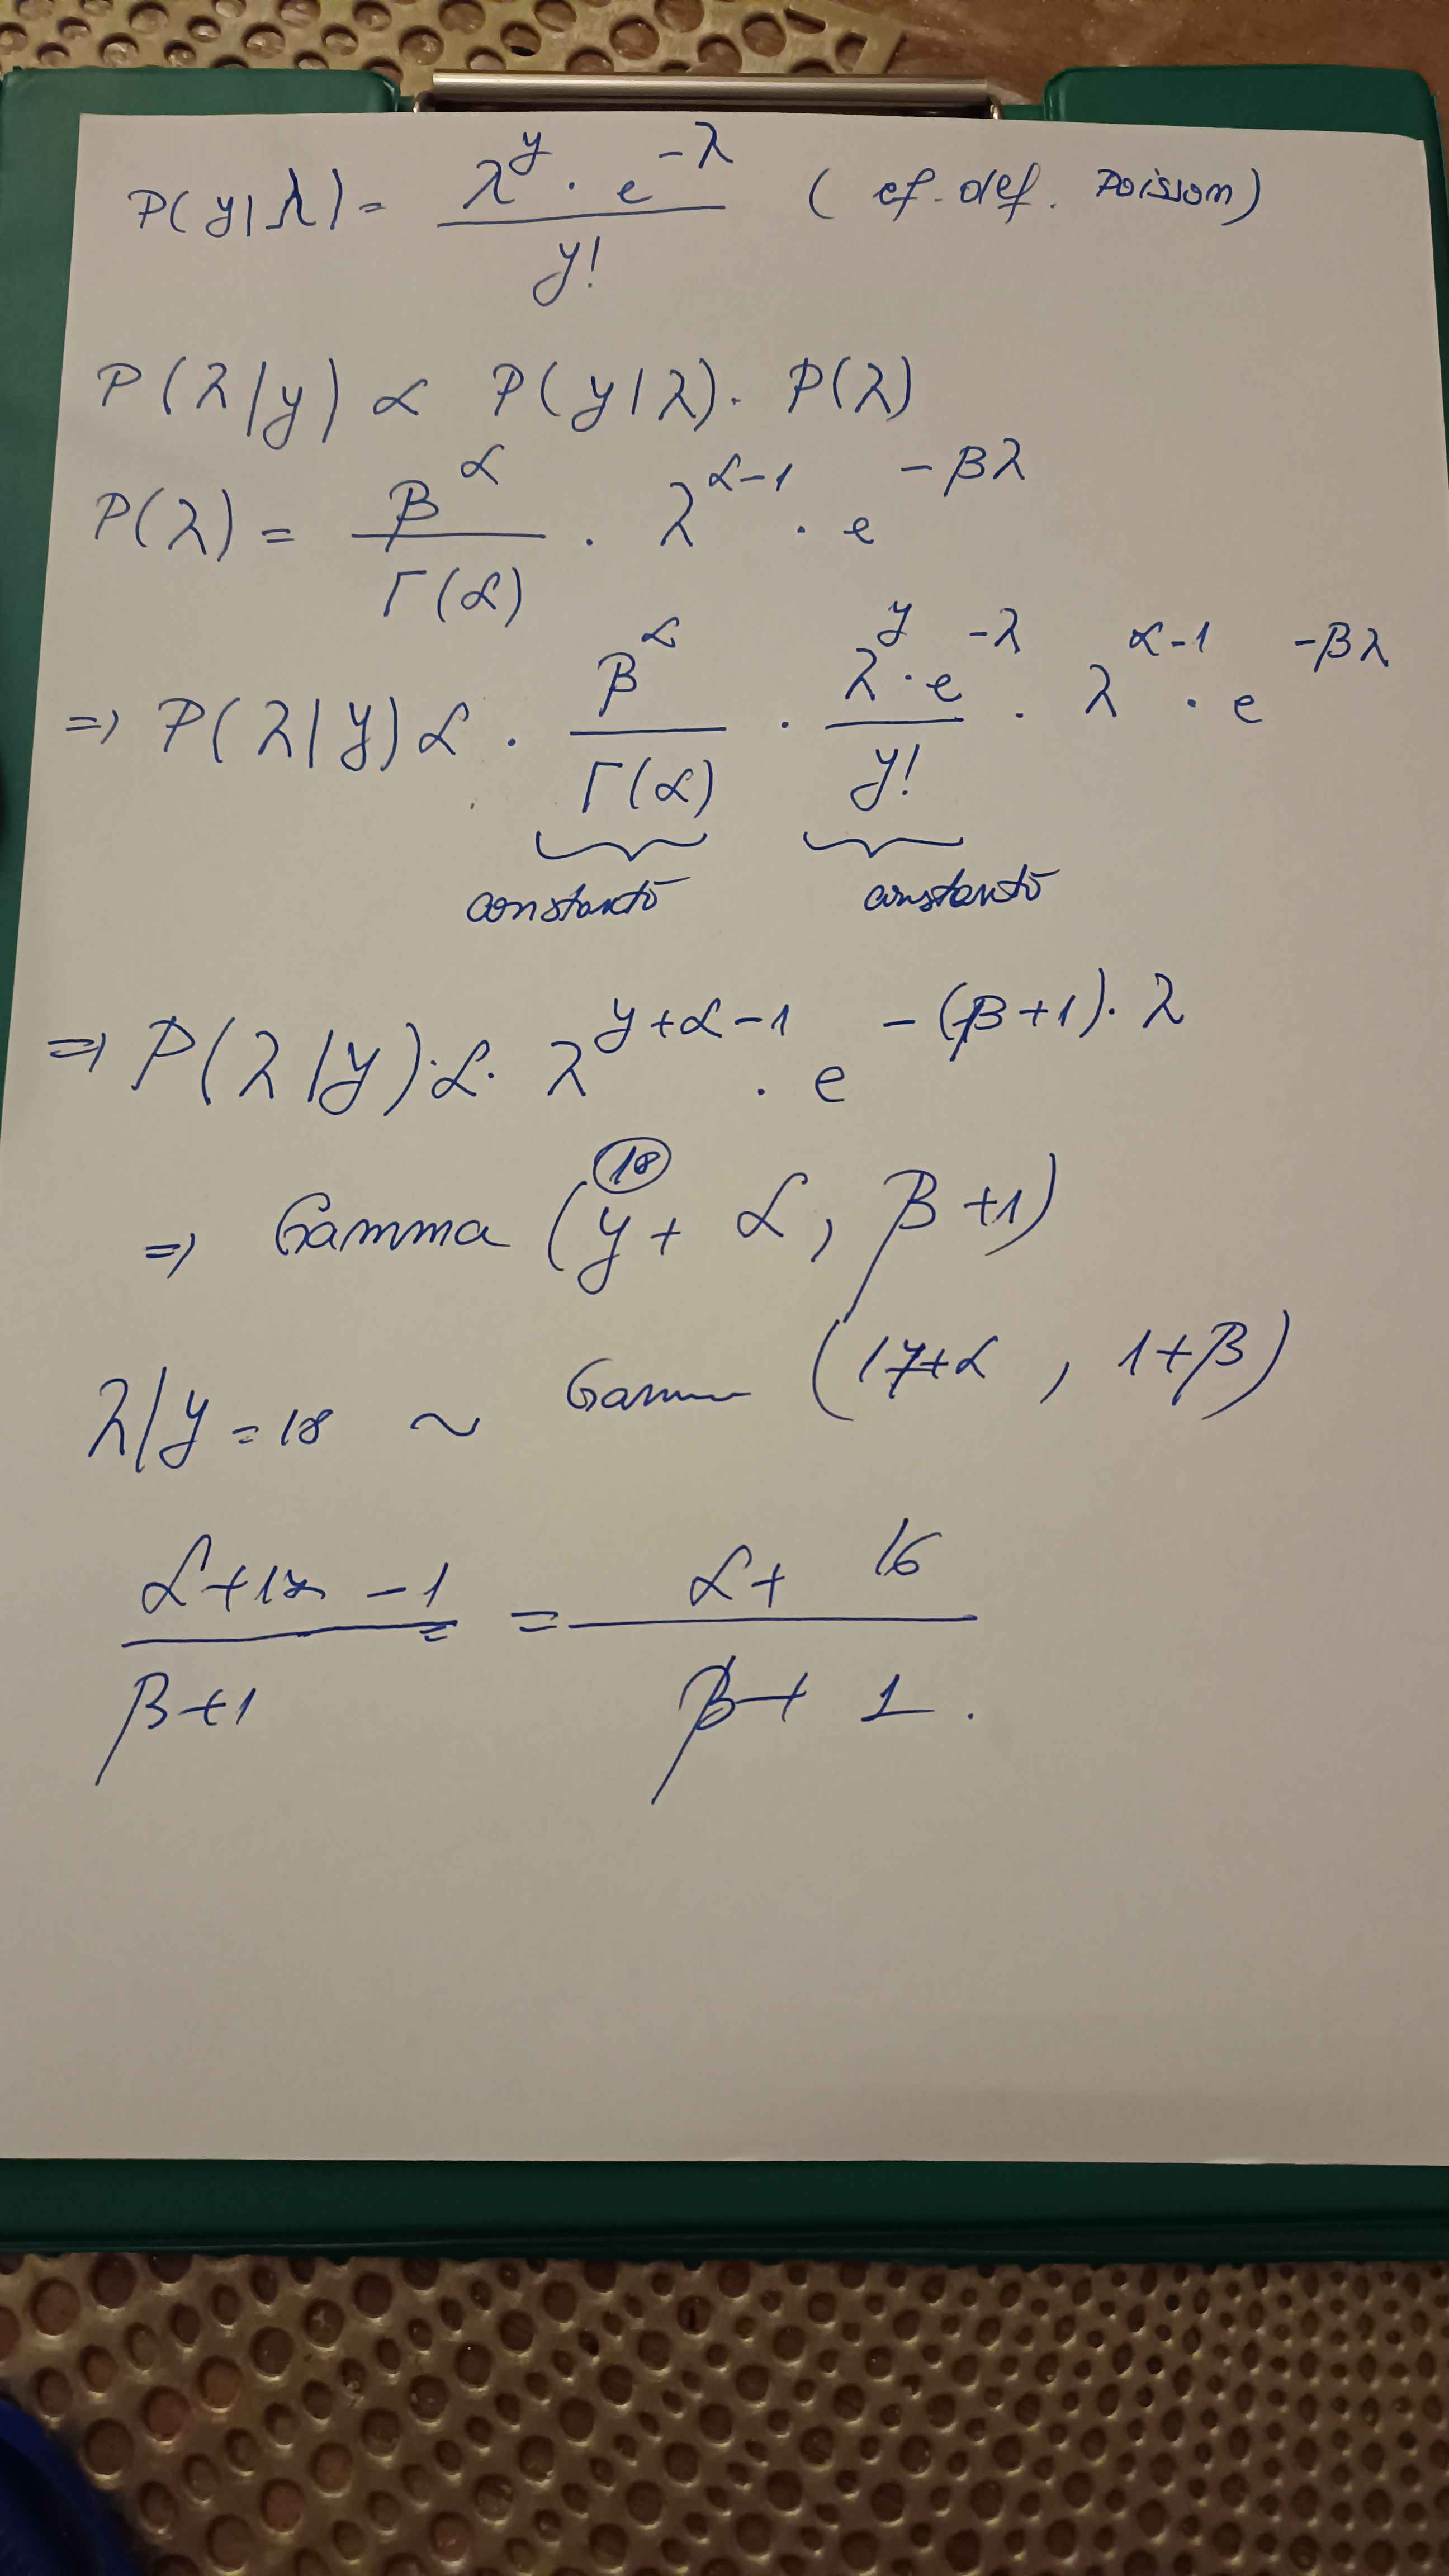

Parametrii distribuției a posteriori Gamma:
alpha_posterior = 198
beta_posterior = 11

Modulul (valoarea cea mai probabilă) pentru λ = 17.90909090909091
Intervalul HDI de 94% pentru λ: [15.571658   20.35376406]


<Axes: title={'center': 'x'}>

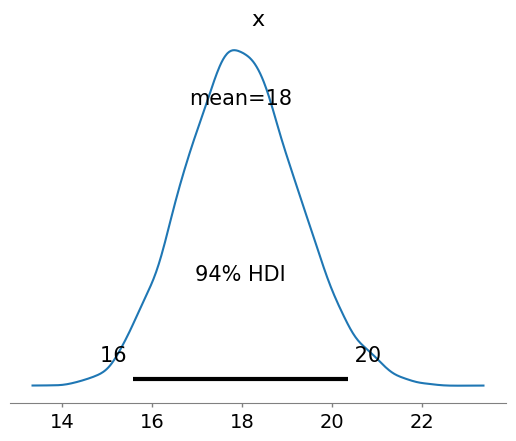

In [5]:
import scipy.stats as stats
import arviz as az

# Datele observate
total_apeluri = 180  # Nr total de apeluri observate
durata_observatie = 10  # Nr de ore de obs

# Parametrii distribuției prior Gamma
alpha_prior = 18  # Parametrul alpha pentru distribuția prior
beta_prior = 1  # Parametrul beta pentru distribuția prior

# Calcularea parametrilor distribuției a posteriori
alpha_posterior = alpha_prior + total_apeluri
beta_posterior = beta_prior + durata_observatie

# Definirea distribuției a posteriori Gamma
distributie_posteriori = stats.gamma(a=alpha_posterior, scale=1/beta_posterior)

# Calcularea modulului (valoarea cea mai probabilă) pentru lambda
mod_lambda = (alpha_posterior - 1) / beta_posterior if alpha_posterior > 1 else 0

# Generarea de eșantioane din distribuția a posteriori
esantioane_posteriori = distributie_posteriori.rvs(10000)
interval_hdi = az.hdi(esantioane_posteriori, hdi_prob=0.94)

# Afișarea rezultatelor
print("Parametrii distribuției a posteriori Gamma:")
print(f"alpha_posterior = {alpha_posterior}")
print(f"beta_posterior = {beta_posterior}\n")
print(f"Modulul (valoarea cea mai probabilă) pentru λ = {mod_lambda}")
print(f"Intervalul HDI de 94% pentru λ: {interval_hdi}")

# Graficul distribuției a posteriori
az.plot_posterior(esantioane_posteriori, hdi_prob=0.94)
